# Digital Image Formation and Enhancement

### Motivation for this set of activities
With cameras found nearly everywhere, (in your phones and laptops, on surveillance CCTV’s, in cars, in laboratories, and in satellites) making objective sense out of images and video is a powerful skill to possess. In the following activities, we first learn how to make synthetic digital images which we can  use for modeling, analysis, and experiments. Images can be saved in different formats or modes depending on the application. Lasty, we learn how to enhance digital images for further use.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

from matplotlib import cm
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import RegularPolygon
from matplotlib.patches import Rectangle

plt.rcParams["figure.figsize"] = (4,4)
# plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 250

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
N = 200
x = np.linspace(-1, 1, num = N)
y = x
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

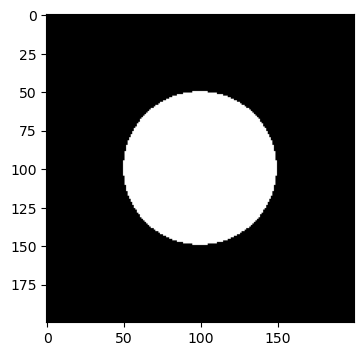

In [3]:
A = np.zeros(np.shape(R))
A[np.where(R < 0.5)] = 1.0

plt.imshow(A, cmap = "gray")

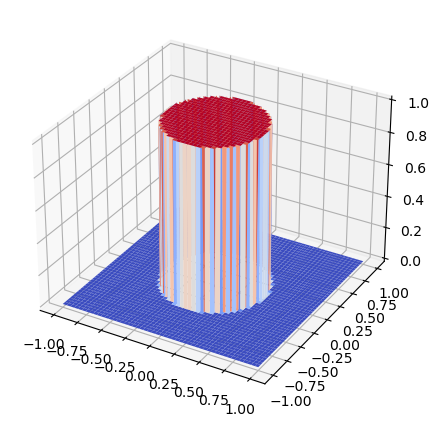

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A, cmap = "coolwarm")

***
## Activity 1.1 - Image DIY

Consider $x \in [-2,2]$ and $y \in [-2,2]$. We are simulating a 4 cm by 4 cm optical element whose size is 400 by 400 pixels.

In [5]:
# Sinusoid along the x-direction, frequency is 4 cycles/cm

N = 400 # image size in pixels
x = np.linspace(0, 4, num = N)
y = x

In [6]:
def sin(x):
    amplitude = 255 / 2
    Z = amplitude*np.sin(8*np.pi*x) + amplitude
    return Z

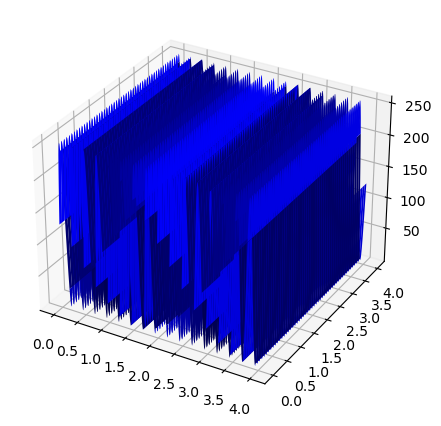

In [7]:
X, Y = np.meshgrid(x, y)
Z = sin(X)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z, color = "blue")
fig.savefig("sinusoid 3d.png")

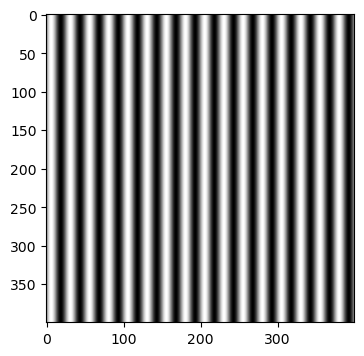

In [8]:
plt.imshow(Z, cmap = "gray")

In [9]:
def grating(x):
    amplitude = 255 / 2
    Z = amplitude*np.sin(10*np.pi*x)
    return Z

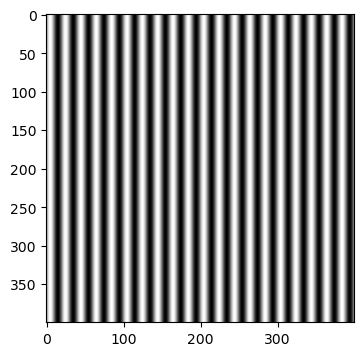

In [10]:
X, Y = np.meshgrid(x, y)
Z = grating(X)

plt.imshow(Z, cmap = "gray")
plt.savefig("grating.png")

### Hubble's Primary Mirror

By setting an area smaller than the disk -- `np.where(R_main < 0.1)` -- we create an annulus corresponding to 0 or black color.

In [11]:
N = 200
x = np.linspace(-1, 1, num = N)
y = x
X, Y = np.meshgrid(x, y)
R_main = np.sqrt(X**2 + Y**2)

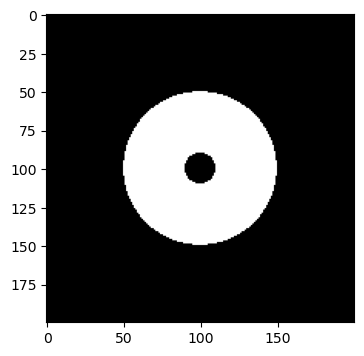

In [12]:
A = np.zeros(np.shape(R_main))
A[np.where(R_main < 0.5)] = 1
A[np.where(R_main < 0.1)] = 0

plt.imshow(A, cmap = "gray")
plt.imsave("hubble mirror.png", A)

### James Webb Space Telescope Simulation

The code was patterned from [this site](https://stackoverflow.com/questions/46525981/how-to-plot-x-y-z-coordinates-in-the-shape-of-a-hexagonal-grid). The idea here is the mathematically determine the centers of the hexagons using basic knowledge on geometry and analytic geometry, as manifested by the formula in `vcoords`. Plotting the circle encapsulating the hexagons were plotted from this [resource](https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot).

In [13]:
centers = [[0, 1, -1], [-1, 1, 0], [-1, 0, 1], [0, -1, 1], [1, -1, 0], [1, 0, -1], 
         [-1, 4, 1], [0, 5, 1], [1, 3, 0], [2, 2, 0], [2, 0, 0], [2, -2, 0], [1, -3, 0],
          [0, -4, 0], [-1, -3, 0], [-2, -2, 0], [-2, 0, 0], [-2, 2, 0]]
hcoords = [c[0] for c in centers] # horizontal cartesian coords
vcoords = [2*np.sin(np.radians(60))*(c[1] - c[2])/3. for c in centers] # vertical cartersian coords

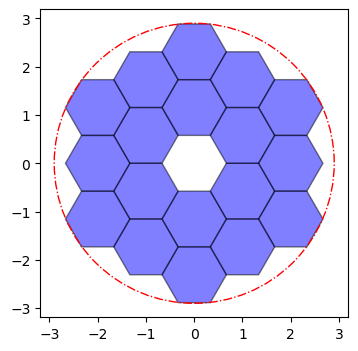

In [14]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

# for drawing a single hexagon that will be mapped in the 2D space
for x, y in zip(hcoords, vcoords):
    hex = RegularPolygon((x, y), numVertices = 6, radius = 2/3, orientation = np.radians(30), 
                         facecolor = "blue", alpha = 0.5, edgecolor = 'k')
    ax.add_patch(hex)
    
ax.scatter(hcoords, vcoords, alpha = 0)

circle = plt.Circle((0, 0), 2.9, color = 'red', alpha = 1, fill = False, linestyle = "-.")
plt.gca().add_patch(circle)
fig.savefig("james webb telescope.png")

***
## Activity 1.2 - Color Image

In creating colored images, we only need to overlay three primary colors in different proportions to produce a color image, due to the trichromatic nature of our vision. Note that the base colors for these are red, green, blue, which are then mixed at different amounts to produce certain colors.

In [15]:
N = 500
x = np.linspace(-10, 10, num = N) 
y = x
X,Y = np.meshgrid(x,y)
Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N))

In [16]:
# draw colored circles
Rt, Rc, deg = 3, 4, 30
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)

R = np.sqrt((X)**2 + (Y+Rt)**2)
Rd[np.where(R<Rc)] = 1.0

R = np.sqrt((X-xt)**2 + (Y-yt)**2)
Gn[np.where(R<Rc)] = 1.0

R = np.sqrt((X+xt)**2 + (Y-yt)**2)
Bl[np.where(R<Rc)] = 1.0

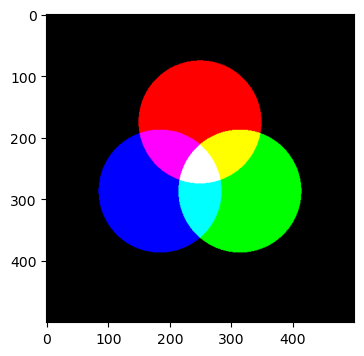

In [17]:
I = np.zeros((N, N, 3))
I[...,0] = Rd
I[...,1] = Gn
I[...,2] = Bl

fig = plt.figure()
plt.imshow(I)

### Olympic Logo

Here we mathematically recreate the Olympics logo as an image using the same argument and code used in the example provided in the module.

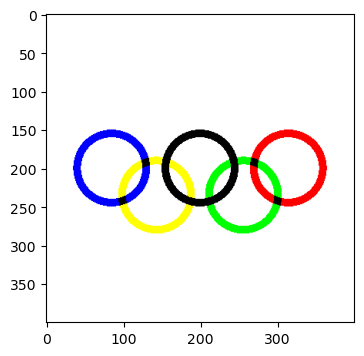

In [18]:
N = 400
x = np.linspace(-20, 20, num = N)
y = x
X,Y = np.meshgrid(x, y)
Rd, Gn, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N))

Rt, Rc, deg = 10, 5, 45
Ri = Rc - 1   
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180) 

# R variables define the circle, then assign points inside that circle as 1  
# Coloring by subtraction - if it is not part of the ring, it gets a value of 0  
# Otherwise, it retains their previous value 

# black circle in the middle - RGB is 0
R = np.sqrt((X)**2 + (Y)**2)  
Rd = np.where(((R<Rc) & (R>Ri)), 0, 1)
Gn = np.where(((R<Rc) & (R>Ri)), 0, 1)
Bl = np.where(((R<Rc) & (R>Ri)), 0, 1)

# left blue circle
R = np.sqrt((X+1.15*Rt)**2 + (Y)**2)
Rd = np.where(((R<Rc) & (R>Ri)), 0, Rd)
Gn = np.where(((R<Rc) & (R>Ri)), 0, Gn)

# right red circle
R = np.sqrt((X-1.15*Rt)**2 + (Y)**2)
Gn = np.where(((R<Rc) & (R>Ri)), 0, Gn)
Bl = np.where(((R<Rc) & (R>Ri)), 0, Bl)

# lower left yellow circle
R = np.sqrt((X+0.8*xt)**2 + (Y-0.5*yt)**2)
Bl = np.where(((R<Rc) & (R>Ri)), 0, Bl)

# lower right green circle
R = np.sqrt((X-0.8*xt)**2 + (Y-0.5*yt)**2)
Bl = np.where(((R<Rc) & (R>Ri)), 0, Bl)
Rd = np.where(((R<Rc) & (R>Ri)), 0, Rd)

I = np.zeros((N,N,3))
I[...,0] = Rd
I[...,1] = Gn
I[...,2] = Bl


fig = plt.figure()
plt.imshow(I)

In [19]:
rgb = I
rgbim = rgb*255
img = rgbim.astype(np.uint8)
plt.imsave("coloredcircle.jpg", img)
plt.imsave("coloredcircle.bmp", img)
plt.imsave("coloredcircle.png", img)
plt.imsave("coloredcircle.tiff", img)

### Philippine Sea Games Logo

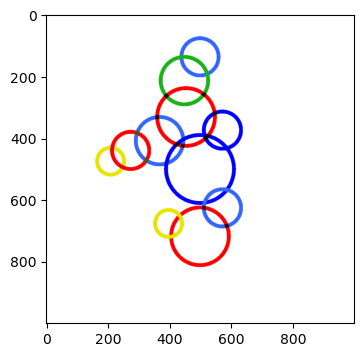

In [20]:
N = 1000
x = np.linspace(-30, 30, num = N)
y = x
X, Y = np.meshgrid(x, y)

Rd, Gn, Bl = np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N))
Rd, Gn, Bl = Rd + 1 , Gn + 1, Bl + 1 # make an array of ones for white channel

#positions and sizes of circles 
radii = np.array([3, 4, 5, 4, 5, 6, 4, 7, 4, 6, 3, 5])
deg = np.array([175, 165, 145, 90, 100, 105, 60, 0, -60, -90, -120])
color = ["yellow", "red", "darkblue", "darkblue", "green", "red", "blue", "blue", "darkblue", "red", "yellow"]
pos = np.array([10, 8, 5.5, 12.5, 10, 6, 5, 0, 5, 7.5, 7])*1.75

radii_in = radii - 0.75
xt, yt = pos*np.cos(deg*np.pi/180), pos*np.sin(deg*np.pi/180)

for circle_index in range(len(color)):
    R = np.sqrt((X-xt[circle_index])**2 + (Y+yt[circle_index])**2)
    if color[circle_index] == "yellow":
        Bl = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0, Bl)
        Gn = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.9, Gn)
        Rd = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.9, Rd) # to adjust yellow shade
    elif color[circle_index] == "red":
        Bl = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0, Bl)
        Gn = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0, Gn)
    elif color[circle_index] == "blue":
        Rd = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0, Rd)
        Gn = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0, Gn)
    elif color[circle_index] == "darkblue":
        Rd = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.2, Rd)
        Gn = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.4, Gn)
    elif color[circle_index] == "green":
        Bl = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.1, Bl)
        Rd = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.1, Rd)
        Gn = np.where(((R<radii[circle_index]) & (R>radii_in[circle_index])), 0.7, Gn)
    else:
        break

I = np.zeros((N,N,3))
I[...,0] = Rd
I[...,1] = Gn 
I[...,2] = Bl


fig = plt.figure()
plt.imshow(I)
plt.imsave("ph sea games logo.png", I)

***
## Activity 1.4 - Histogram Manipulation by Backprojection

The **histogram** of an image is a plot of grayscale value or digital numbers (DN) versus the number of
pixels having those values. Most image processing software allow you to view the histogram of an image
in different **channels** (e.g. R,G,B) or in **color spaces** (e.g. hue, saturation, value or brightness). The
histogram of a grayscale image is a low level property of an image because it is obtained from the pixel
values only. High level properties such as texture or edges are obtained from areas of neighboring pixels.
An image has poor contrast if its histogram is either skewed towards the brighter or the darker
graylevels. A good contrast image will have an evenly distributed histogram across the grayscale.

In this activity we will learn different techniques to alter the histogram of an image for a human observer
to see information even in seemingly dark or poor contrast images. We examine grayscale histogram of our image and normalize by the number of pixels to get its PDF. By then, we can compute the CDF from the PDF and observe such comparisons.

The conversion of the image of the penguin above to grayscale was executed based from this [this site](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python).

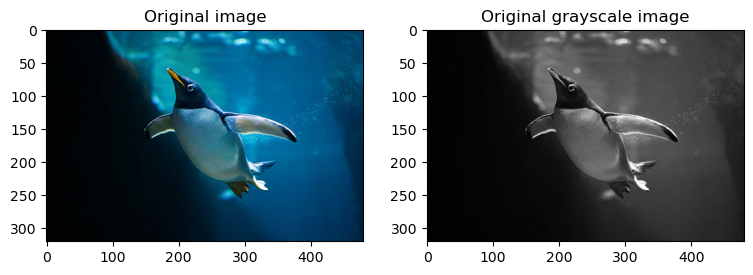

In [82]:
origimg = mpimg.imread("penguin.png") # to open penguin image
img = Image.open("penguin.png")
grayimg = np.array(img.convert("L"))

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].imshow(origimg)
ax[0].set_title(r"Original image")
ax[1].imshow(grayimg, cmap = "gray")
ax[1].set_title(r"Original grayscale image")

plt.imsave("original grayscale pic.png", grayimg, cmap = "gray")

### Histogram Backprojection on Grayscale Images - Linear CDF

The corresponding PDF and CDF of our original grayscale image above is shown below for reference.

Text(0.5, 0, 'Gray number')

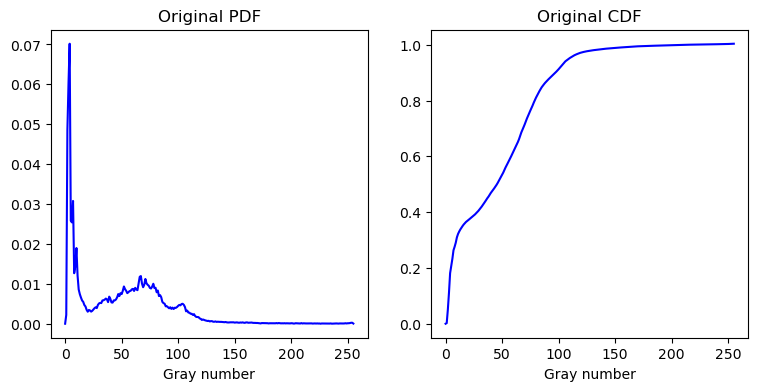

In [89]:
PDF_hist, PDF_edge = np.histogram(grayimg, 256, density = True)
CDF = np.cumsum(PDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(PDF_hist, color = "blue")
ax[0].set_title(r"Original PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(CDF, color = "blue")
ax[1].set_title(r"Original CDF")
ax[1].set_xlabel(r"Gray number")

Applying the histogram backprojection technique,

255

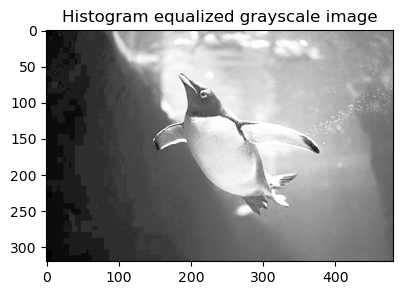

In [6]:
gray_array = grayimg.flatten() # flattens your img to 1D array - concantenation

linear_CDF = np.arange(0, 256, 1)
desired_CDF = linear_CDF/256
new_gray = np.interp(CDF[gray_array], linear_CDF, desired_CDF)
new_grayimg = np.reshape(new_gray, np.shape(grayimg))
# plt.imshow(new_grayimg, cmap = "gray")
# plt.title(r"Linearized grayscale image")
plt.imsave("histmanipulated penguin - linear.png", new_grayimg, cmap = "gray")


# Normalizing the image gray number from 0 to 255
histmanipulated_penguin_img = Image.open("histmanipulated penguin - linear.png")
histmanipulated_penguin_grayimg = np.array(histmanipulated_penguin_img.convert("L"))

plt.figure(figsize = (6, 3))
plt.imshow(histmanipulated_penguin_grayimg, cmap = "gray")
plt.title(r"Histogram equalized grayscale image")
histmanipulated_penguin_grayimg.max()

Comparing the PDF and CDF of the new grayscale image from the original image,

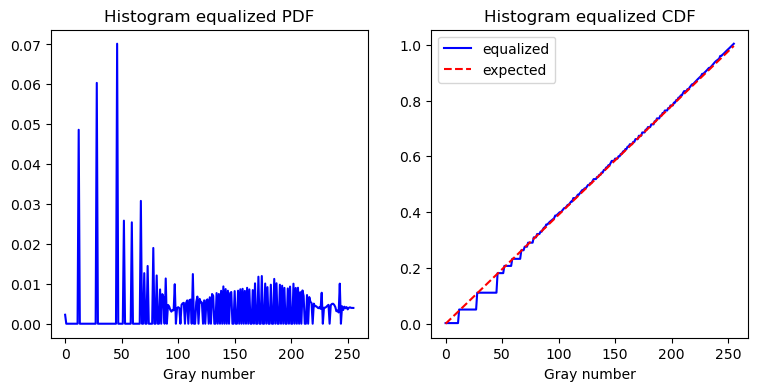

In [7]:
newPDF_hist, newPDF_edge = np.histogram(histmanipulated_penguin_grayimg, 256, density = True)
newCDF = np.cumsum(newPDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(newPDF_hist, color = "blue")
ax[0].set_title(r"Histogram equalized PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(newCDF, color = "blue", label = "equalized")
ax[1].plot(np.arange(0, 256, 1)/256, color = "red", linestyle = "--", label = "expected")
ax[1].set_title(r"Histogram equalized CDF")
ax[1].set_xlabel(r"Gray number")
ax[1].legend()

### Histogram Backprojection on Grayscale Images - Nonlinear CDF

In [8]:
domain = np.arange(0, 256)

def sigmoid(x, curve = 0.05, center = np.median(domain)):
    a, b = curve, center
    function = 1/(1 + np.exp(-a*(x-b)))
    return function

In [9]:
# domain = np.linspace(-10, 10, 256)
# xvals = np.linspace(0, 256, 256)
# plt.plot(xvals, sigmoid(domain), color = "blue")

# plt.plot(sigmoid(domain), color = "blue")
# plt.title(r"Desired CDF")
# plt.xlabel(r"Gray number")

Applying the same backprojection algorithm implemented for a linear CDF,

255

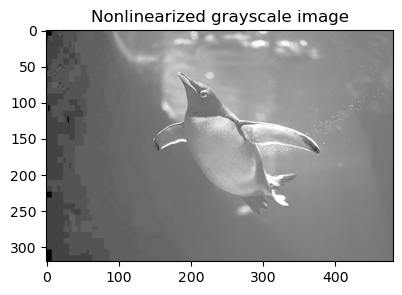

In [10]:
sigmoid_CDF = sigmoid(domain)
desired_sigCDF = sigmoid(domain/256) # not sigmoid_CDF/256
new_gray_sig = np.interp(CDF[gray_array], sigmoid_CDF, desired_sigCDF)
new_grayimg_sig = np.reshape(new_gray_sig, np.shape(grayimg))
# plt.imshow(new_grayimg_sig, cmap = "gray")
# plt.title(r"Non-linearized grayscale image")
plt.imsave("histmanipulated penguin - sig.png", new_grayimg_sig, cmap = "gray")


# Normalizing the image gray number from 0 to 255
histmanipulated_penguin_sig_img = Image.open("histmanipulated penguin - sig.png")
histmanipulated_penguin_sig_grayimg = np.array(histmanipulated_penguin_sig_img.convert("L"))

plt.figure(figsize = (6, 3))
plt.imshow(histmanipulated_penguin_sig_grayimg, cmap = "gray")
plt.title(r"Nonlinearized grayscale image")
histmanipulated_penguin_sig_grayimg.max()

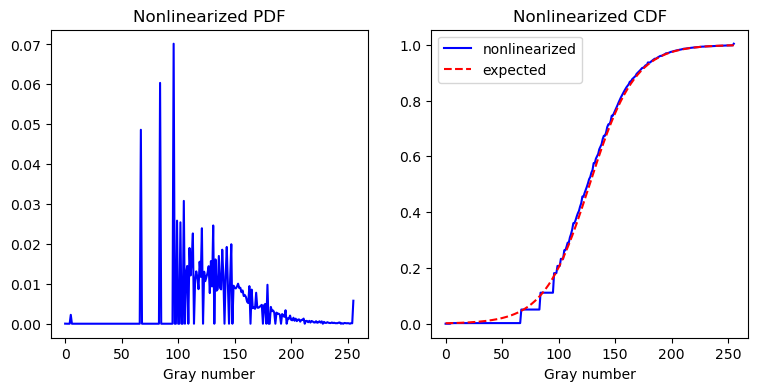

In [11]:
sig_newPDF_hist, sig_newPDF_edge = np.histogram(histmanipulated_penguin_sig_grayimg, 256, density = True)
sig_newCDF = np.cumsum(sig_newPDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(sig_newPDF_hist, color = "blue")
ax[0].set_title(r"Nonlinearized PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(sig_newCDF, color = "blue", label = "nonlinearized")
ax[1].plot(sigmoid(domain), color = "red", linestyle = "--", label = "expected")
ax[1].set_title(r"Nonlinearized CDF")
ax[1].set_xlabel(r"Gray number")
ax[1].legend()

***
## Activity 1.5 - Contrast Enhancement

### Contrast Stretching

Suppose we have a set of numbers $I_{\text{old}}$, say an array or a vector, for example. In that set the minimum value is $I_{\text{min}}$ and the maximum value $I_{\text{max}}$. To contrast “stretch” the values of $I_{\text{old}}$ , we normalize using $$I_{\text{new}} = \frac{I_{\text{old}} - I_{\text{min}}}{I_{\text{max}} - I_{\text{min}}}$$

In [12]:
def contrast_stretch(img):
    grayimg_stretch = (img - img.min())/(img.max() - img.min())
    return grayimg_stretch

255

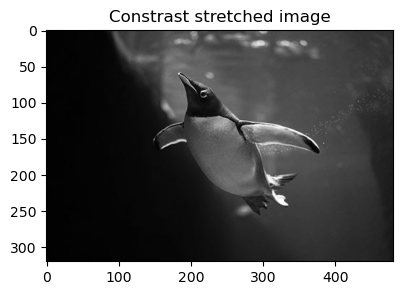

In [13]:
grayimg_stretch = contrast_stretch(grayimg)
# plt.imshow(grayimg_stretch, cmap = "gray")
# plt.title(r"Contrast stretched image")
plt.imsave("contrast stretched penguin.png", grayimg_stretch, cmap = "gray")

# Normalizing the image gray number from 0 to 255
cs_penguin_img = Image.open("contrast stretched penguin.png")
cs_penguin_grayimg = np.array(cs_penguin_img.convert("L"))
plt.figure(figsize = (6, 3))
plt.imshow(cs_penguin_grayimg, cmap = "gray")
plt.title(r"Constrast stretched image")
cs_penguin_grayimg.max()

It can be observed that there are no changes from the original grayscale image as the normalization equation does not alter the image matrix.

Text(0.5, 0, 'Gray number')

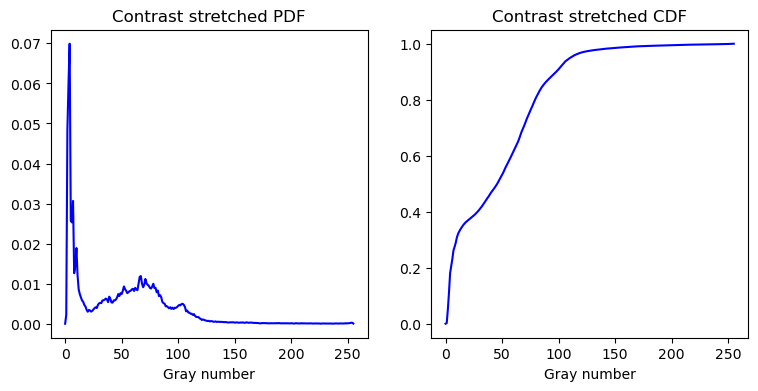

In [14]:
csnewPDF_hist, csnewPDF_edge = np.histogram(grayimg_stretch, 256, density = True)
csnewCDF = np.cumsum(csnewPDF_hist)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
ax[0].plot(csnewPDF_hist/256, color = "blue")
ax[0].set_title(r"Contrast stretched PDF")
ax[0].set_xlabel(r"Gray number")
ax[1].plot(csnewCDF/256, color = "blue")
ax[1].set_title(r"Contrast stretched CDF")
ax[1].set_xlabel(r"Gray number")

***
## Histogram backprojection summary
In summary, we have the following comparison plots of the probability distribution and cumulative distribution functions of our manipulated images:

In [174]:
def histogram_backprojection(grayimg):
    grayimg_stretch = contrast_stretch(grayimg)
    domain = np.arange(0, 256)
    linear_CDF = np.arange(0, 256, 1)
    nonlinear_CDF = sigmoid(domain)

    # original vs contrast stretched image
    fig, ax = plt.subplots(1, 2, figsize = (9.1, 4))
    ax[0].imshow(grayimg, cmap = "gray")
    ax[0].set_title(r"Original grayscale image")
    ax[1].imshow(grayimg_stretch, cmap = "gray")
    ax[1].set_title(r"Contrast stretched image")
    
    # PDF and CDF comparison of original and contrast stretched image
    fig, ax = plt.subplots(1, 2, figsize = (9, 4))
    PDF_hist, PDF_edge = np.histogram(grayimg, 256, density = True)
    CDF = np.cumsum(PDF_hist)
    csPDF_hist, csPDF_edge = np.histogram(grayimg_stretch, 256, density = True)
    csCDF = np.cumsum(csPDF_hist)
    
    ax[0].plot(PDF_hist, color = "blue", label = "original")
    ax[0].set_title(r"Probability distribution function")
    ax[0].set_xlabel(r"Gray number")
    ax[0].plot(csPDF_hist/256, color = "red", linestyle = "--", label = "contrast stretched")
    ax[0].legend()
    
    ax[1].plot(CDF, color = "blue", label = "original")
    ax[1].set_title(r"Cumulative distribution function")
    ax[1].set_xlabel(r"Gray number")
    ax[1].plot(csCDF/256, color = "red", linestyle = "--", label = "contrast stretched")
    ax[1].legend()
    
    plt.savefig("pdf vs cdf - contrast stretched.png")
    
    # original vs histogram equalized image
    fig, ax = plt.subplots(1, 2, figsize = (9.1, 4))
    ax[0].imshow(grayimg, cmap = "gray")
    ax[0].set_title(r"Original grayscale image")
    ax[1].imshow(histmanipulated_penguin_grayimg, cmap = "gray")
    ax[1].set_title(r"Histogram equalized image")
    
    # PDF and CDF comparison of the original and equalized image
    fig, ax = plt.subplots(1, 2, figsize = (9, 4))
    PDF_hist, PDF_edge = np.histogram(grayimg, 256, density = True)
    CDF = np.cumsum(PDF_hist)
    linearized_PDF_hist, linearized_PDF_edge = np.histogram(histmanipulated_penguin_grayimg, 
                                                            256, density = True)
    linearized_CDF = np.cumsum(linearized_PDF_hist)
    
    ax[0].plot(PDF_hist, color = "blue", label = "original")
    ax[0].set_title(r"Probability distribution function")
    ax[0].set_xlabel(r"Gray number")
    ax[0].plot(linearized_PDF_hist, color = "red", linestyle = "-", label = "equalized")
    ax[0].plot(PDF_hist, color = "blue") # call twice to overlay densed equalized plot
    ax[0].legend()
    
    ax[1].plot(CDF, color = "blue", label = "original")
    ax[1].set_title(r"Cumulative distribution function")
    ax[1].set_xlabel(r"Gray number")
    ax[1].plot(linearized_CDF, color = "red", linestyle = "-", label = "equalized")
    ax[1].plot(linear_CDF/256, color = "black", linestyle = ":", label = "expected")
    ax[1].legend()
    
    plt.savefig("pdf vs cdf - linearized.png")
    
    # original vs nonlinearized equalized image
    fig, ax = plt.subplots(1, 2, figsize = (9.1, 4))
    ax[0].imshow(grayimg, cmap = "gray")
    ax[0].set_title(r"Original grayscale image")
    ax[1].imshow(histmanipulated_penguin_sig_grayimg, cmap = "gray")
    ax[1].set_title(r"Nonlinearized image")
    
    # PDF and CDF comparison of the original and nonlinearized image
    fig, ax = plt.subplots(1, 2, figsize = (9, 4))
    
    PDF_hist, PDF_edge = np.histogram(grayimg, 256, density = True)
    CDF = np.cumsum(PDF_hist)
    nonlinearized_PDF_hist, nonlinearized_PDF_edge = np.histogram(histmanipulated_penguin_sig_grayimg, 
                                                                  256, density = True)
    nonlinearized_CDF = np.cumsum(nonlinearized_PDF_hist)
    
    ax[0].plot(PDF_hist, color = "blue", label = "original")
    ax[0].set_title(r"Probability distribution function")
    ax[0].set_xlabel(r"Gray number")
    ax[0].plot(nonlinearized_PDF_hist, color = "red", linestyle = "-", label = "nonlinearized")
    ax[0].plot(PDF_hist, color = "blue")
    ax[0].legend()
    
    ax[1].plot(CDF, color = "blue", label = "original")
    ax[1].set_title(r"Cumulative distribution function")
    ax[1].set_xlabel(r"Gray number")
    ax[1].plot(nonlinearized_CDF, color = "red", linestyle = "-", label = "nonlinearized")
    ax[1].plot(nonlinear_CDF, color = "black", linestyle = ":", label = "expected")
    ax[1].legend()
    
    plt.savefig("pdf vs cdf - nonlinearized.png")

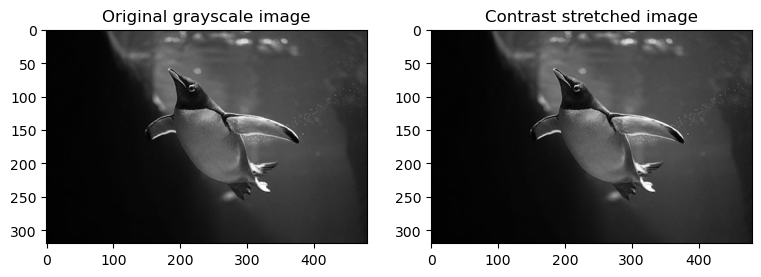

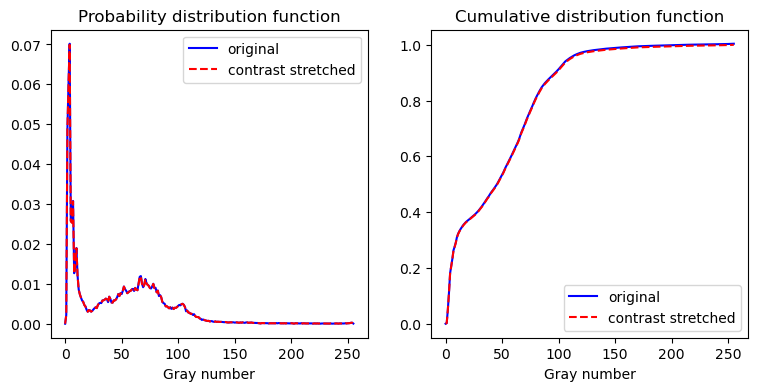

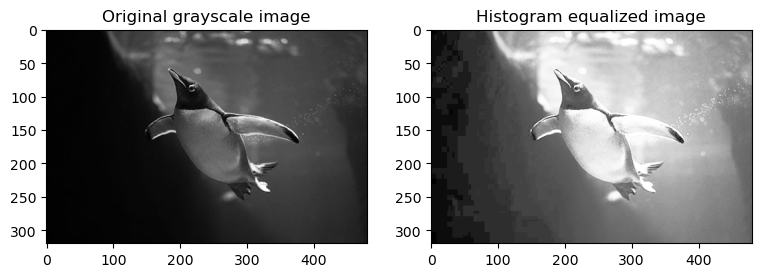

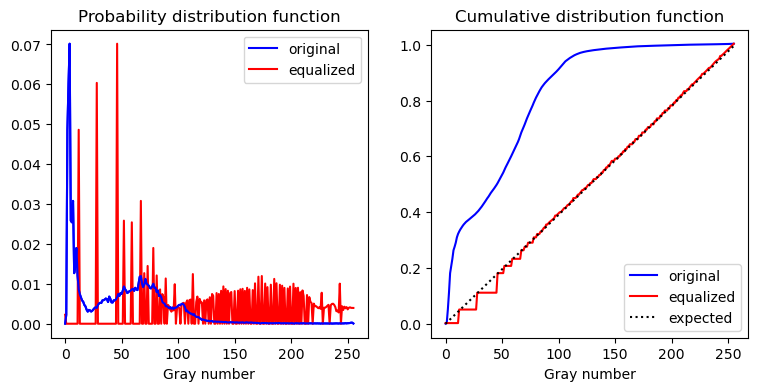

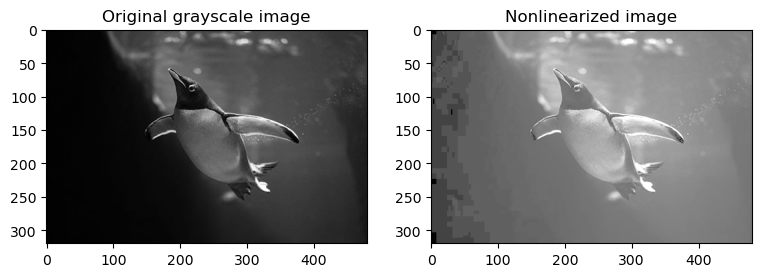

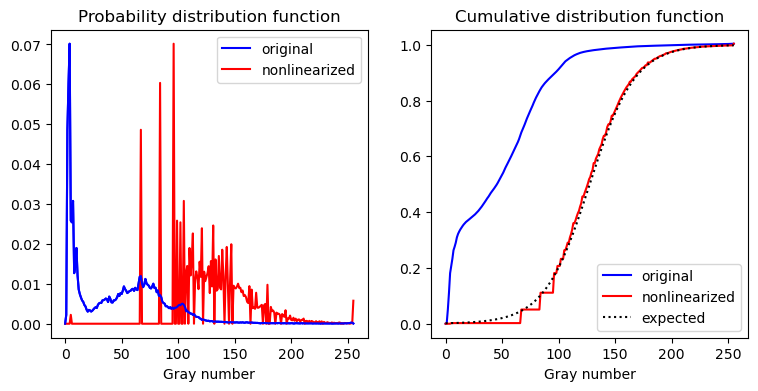

In [175]:
histogram_backprojection(grayimg)

***
## Activity 1.6 - Restoring Faded Colored Photographs

White balancing algorithms can be used to restore faded color photographs or correct unbalanced images, i.e. if there is a known white object in the scene but it does not look white. In color images, white balancing can be achieved by contrast stretching each color channel separately using a set percentile for minimum and maximum. We will be implementing three white balancing algorithms to our [image](https://www.windowscentral.com/minecraft-dungeons-adds-free-seasonal-adventures-starting-cloudy-climb) for this last activity.

In [247]:
img = plt.imread("minecraft.png")
img *= 255
img = img.astype(int)

# plt.figure(figsize = (6, 3))
# plt.imshow(img)
# plt.title(r"Original image")

### Contrast Stretching in RGB

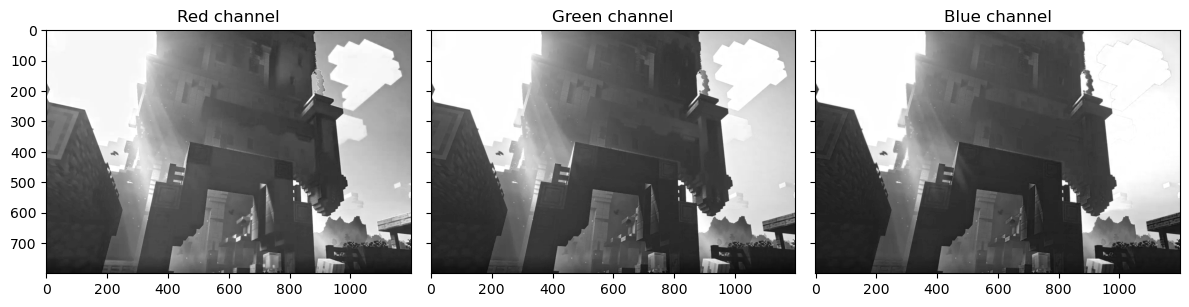

In [248]:
Rd, Gn, Bl = img[:,:,0], img[:,:,1], img[:,:,2]
channels = [Rd, Gn, Bl]
titles = ["Red channel", "Green channel", "Blue channel"]

fig, ax = plt.subplots(1, 3, figsize = (12, 6), sharey = True)
for i in range(len(channels)):
    ax[i].imshow(channels[i], cmap = "gray")
    ax[i].set_title(titles[i])

fig.tight_layout()

We also examine the RGB histogram of the original image as shown.

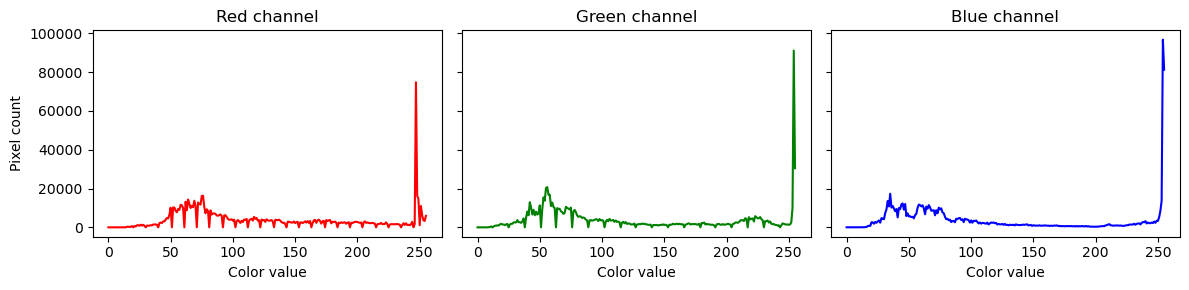

In [249]:
plot_colors = ["red", "green", "blue"]

fig, ax = plt.subplots(1, 3, figsize = (12, 3), sharey = True)
for i, j in enumerate(channels):
    RGB_hist, RGB_edge = np.histogram(j, 256)
    ax[i].plot(RGB_hist, color = plot_colors[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel(r"Color value")
    ax[0].set_ylabel(r"Pixel count")
    
fig.tight_layout()

We perform contrast stretching on each of these channels and overlay them into one matrix to form an RGB image. The code algorithm was adapted from this [site](https://stackoverflow.com/questions/74053649/combining-3-channel-numpy-array-to-form-an-rgb-image) - use of `np.dstack()` to merge channels into length by width by channel sizes.

Text(0.5, 1.0, 'Contrast stretched image')

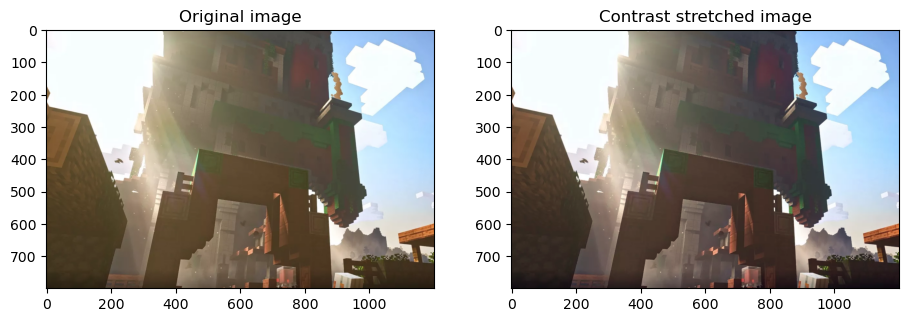

In [257]:
Rd_restored, Gn_restored, Bl_restored = contrast_stretch(Rd), contrast_stretch(Gn), contrast_stretch(Bl)
RGB_restored = np.dstack((Rd_restored, Gn_restored, Bl_restored))
RGB_restored *= 255
RGB_restored = RGB_restored.astype(np.uint8)
plt.imsave("rgb stretched.png", RGB_restored)

fig, ax = plt.subplots(1, 2, figsize = (11, 6))
ax[0].imshow(img)
ax[0].set_title(r"Original image")
ax[1].imshow(RGB_restored)
ax[1].set_title(r"Contrast stretched image")

Comparing the RGB histogram of our contrast stretched image,

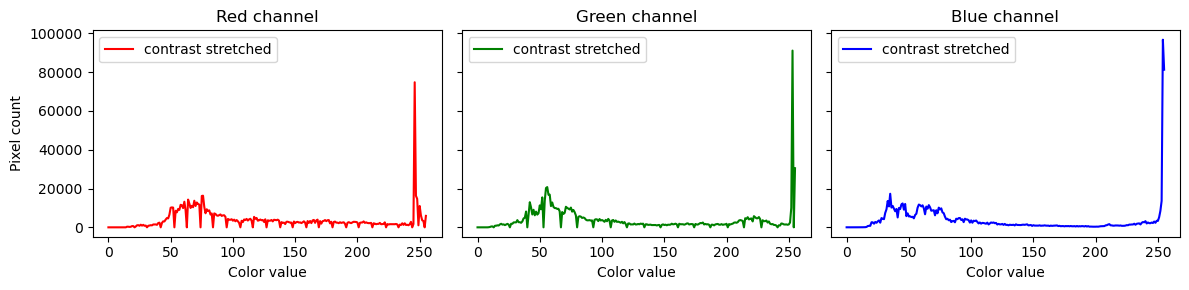

In [279]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3), sharey = True)
for i, j in enumerate(channels):
    RGB_hist, RGB_edge = np.histogram(j, 256)
    csRGB_hist, csRGB_edge = np.histogram(RGB_restored[:,:,i], 256)
    ax[i].plot(csRGB_hist, color = plot_colors[i], label = "contrast stretched")
    ax[i].set_title(titles[i])
    ax[i].legend(loc = "upper left")
    ax[i].set_xlabel(r"Color value")
    ax[0].set_ylabel(r"Pixel count")
    
fig.tight_layout()

### Gray World Algorithm

Text(0.5, 1.0, 'White balanced image')

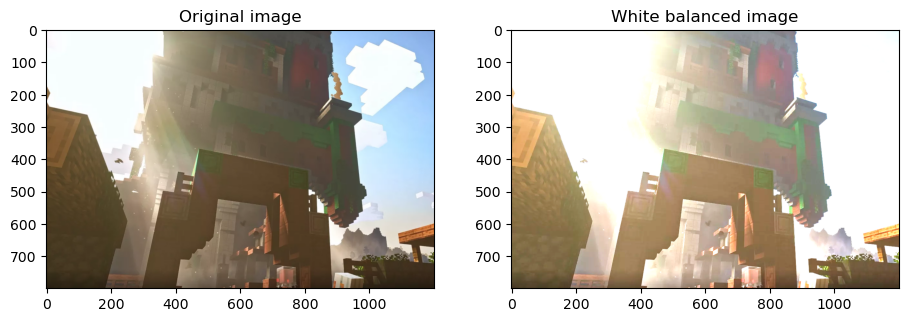

In [281]:
Rdave, Gnave, Blave = np.average(Rd), np.average(Gn), np.average(Bl)
RdWB, GnWB, BlWB = Rd/Rdave, Gn/Gnave, Bl/Blave
RGB_GWArestored = np.dstack((RdWB, GnWB, BlWB))
RGB_GWArestored_clipped = np.clip(RGB_GWArestored, 0, 1)
plt.imsave("rgb gwa.png", RGB_GWArestored_clipped)

fig, ax = plt.subplots(1, 2, figsize = (11, 6))
ax[0].imshow(img)
ax[0].set_title(r"Original image")
ax[1].imshow(RGB_GWArestored_clipped)
ax[1].set_title(r"White balanced image")

Comparing the RGB histogram of our white balanced image using the gray world algorithm,

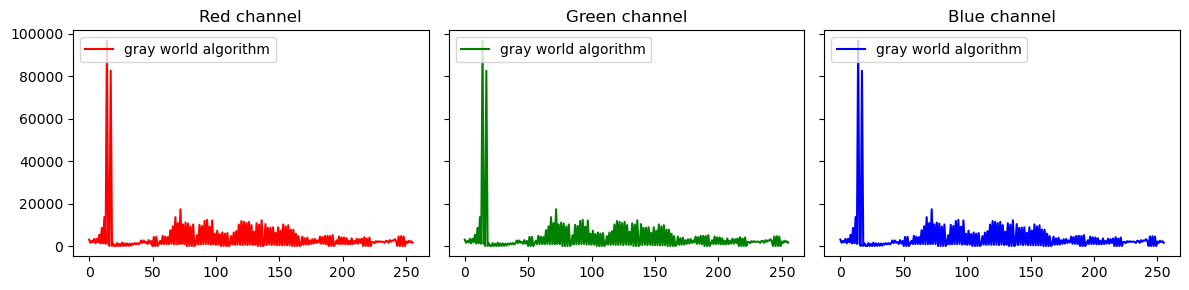

In [282]:
RGB_GWArestored *= 255
RGB_GWArestored = RGB_GWArestored.astype(np.uint8)
gwa_channels = [RdWB, GnWB, BlWB]

fig, ax = plt.subplots(1, 3, figsize = (12, 3), sharey = True)
for i, j in enumerate(channels):
    RGB_hist, RGB_edge = np.histogram(j, 256)
    gwaRGB_hist, gwaRGB_edge = np.histogram(RGB_GWArestored[:,:,k], 256)
    ax[i].plot(gwaRGB_hist, color = plot_colors[i], label = "gray world algorithm")
    ax[i].set_title(titles[i])
    ax[i].legend(loc = "upper left")
    
fig.tight_layout()

### White Patch Algorithm

Get a region from the image which is known to be white. Then, average the RGB of the white pixels to get `Rdw`, `Gnw`, and `Blw`, separately.

Text(0.5, 1.0, 'Region of interest')

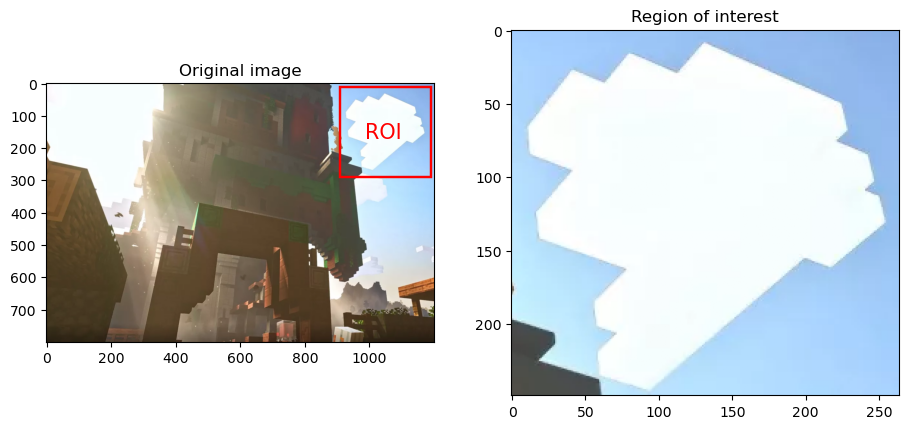

In [38]:
ROI = mpimg.imread("minecraft ROI.png")

fig, ax = plt.subplots(1, 2, figsize = (11, 6))
ax[0].imshow(img)
ax[0].set_title(r"Original image")

rect = Rectangle((910, 10), 280, 280, linewidth = 1.75, edgecolor = "red", facecolor = "none")
ax[0].add_patch(rect)
ax[0].annotate("ROI", (985, 170), color = "red", fontsize = 15)

ax[1].imshow(ROI)
ax[1].set_title(r"Region of interest")

Text(0.5, 1.0, 'White balanced image')

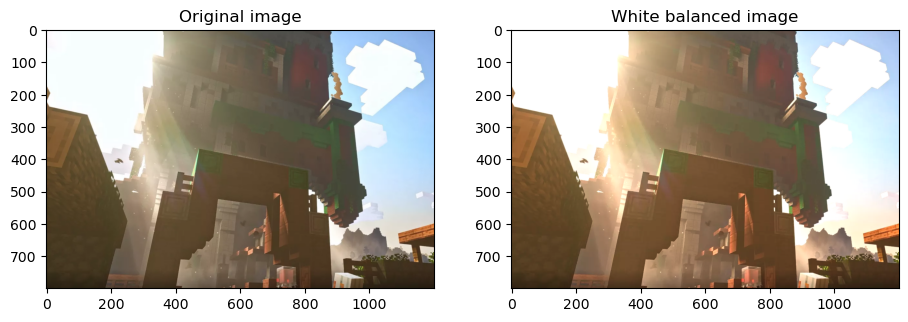

In [39]:
Rdroi, Gnroi, Blroi = ROI[:,:,0], ROI[:,:,1], ROI[:,:,2]

RdW, GnW, BlW = np.average(Rdroi), np.average(Gnroi), np.average(Blroi)
RdWB1, GnWB2, BlWB3 = Rd/RdW, Gn/GnW, Bl/BlW
RGB_WPArestored = np.dstack((RdWB1, GnWB2, BlWB3))
RGB_WPArestored_clipped = np.clip(RGB_WPArestored, 0, 1)
plt.imsave("rgb wpa.png", RGB_WPArestored_clipped)

fig, ax = plt.subplots(1, 2, figsize = (11, 6))
ax[0].imshow(img)
ax[0].set_title(r"Original image")
ax[1].imshow(RGB_WPArestored_clipped)
ax[1].set_title(r"White balanced image")

####  Errors encountered in the code

The gray world and white patch algorithms initially yielded an error of `Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)`. Upon checking the `dtype` of my image arrays, the float range was out of bound of the range that can be read by Matplotlib. This was circumvented by clipping the RGB array from 0 to 1 using `np.clip`, as suggested by this [site](https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa) and also [converting 0 to 1 floats to 0 to 255 RGB array](https://stackoverflow.com/questions/69510749/how-to-convert-0-1-image-float-array-to-0-255-int-array).